In [1]:
url = "https://raw.githubusercontent.com/edavgaun/RCEL_506/refs/heads/main/Module%203/Housing%20states/housing_oh.csv"

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
from IPython.display import display

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
df = pd.read_csv(url)
df.columns

Index(['Unnamed: 0', 'url', 'region', 'price', 'type', 'sqfeet', 'beds',
       'baths', 'cats_allowed', 'dogs_allowed', 'smoking_allowed',
       'wheelchair_access', 'electric_vehicle_charge', 'comes_furnished',
       'laundry_options', 'parking_options', 'image_url', 'description', 'lat',
       'long', 'state'],
      dtype='object')

In [6]:
num_rows = df.shape[0]
print(num_rows)

12884


In [7]:
display(df.head())

,Unnamed: 0,url,region,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
0,218910,https://cincinnati.craigslist.org/apa/d/ft-mit...,cincinnati,865,apartment,954,2,1.5,1,1,1,0,0,0,laundry on site,off-street parking,https://images.craigslist.org/00K0K_lkEoV3GGQE...,To schedule a tour We now book our tour appoin...,39.0300,-84.5590,oh
1,218959,https://akroncanton.craigslist.org/apa/d/akron...,akron / canton,865,apartment,694,1,1.0,1,1,1,1,0,0,w/d in unit,off-street parking,https://images.craigslist.org/00o0o_6togwuOlPG...,"Cascade Falls 1761 E. Waterford Ct., Akron, OH...",41.1379,-81.5409,oh
2,218969,https://cincinnati.craigslist.org/apa/d/floren...,cincinnati,672,apartment,750,1,1.0,1,1,1,0,0,0,laundry in bldg,off-street parking,https://images.craigslist.org/00A0A_9DMfKX2e6H...,To schedule a tour We now book our tour appoin...,38.9941,-84.6420,oh
3,218983,https://cincinnati.craigslist.org/apa/d/west-c...,cincinnati,835,apartment,830,2,1.0,1,1,1,0,0,0,NaN,off-street parking,https://images.craigslist.org/00505_47m5JhFDYW...,To schedule a tour We now book our tour appoin...,39.3402,-84.3998,oh
4,219024,https://akroncanton.craigslist.org/apa/d/akron...,akron / canton,895,apartment,1000,2,1.0,0,0,0,0,0,0,w/d hookups,attached garage,https://images.craigslist.org/00K0K_3OLyzESdT7...,2 bed 1 bath Triplex. Clean. BRAND New Modern ...,40.9797,-81.4739,oh


In [8]:
columns = ['region', 'price', 'type', 'sqfeet', 'beds',
       'baths', 'cats_allowed', 'dogs_allowed', 'smoking_allowed',
       'wheelchair_access', 'electric_vehicle_charge', 'comes_furnished',
       'laundry_options', 'parking_options', 'description', 'lat',
       'long']

df = df[columns]

In [9]:
df.shape

(12884, 17)

In [10]:
display(df.head())

,region,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,description,lat,long
0,cincinnati,865,apartment,954,2,1.5,1,1,1,0,0,0,laundry on site,off-street parking,To schedule a tour We now book our tour appoin...,39.0300,-84.5590
1,akron / canton,865,apartment,694,1,1.0,1,1,1,1,0,0,w/d in unit,off-street parking,"Cascade Falls 1761 E. Waterford Ct., Akron, OH...",41.1379,-81.5409
2,cincinnati,672,apartment,750,1,1.0,1,1,1,0,0,0,laundry in bldg,off-street parking,To schedule a tour We now book our tour appoin...,38.9941,-84.6420
3,cincinnati,835,apartment,830,2,1.0,1,1,1,0,0,0,NaN,off-street parking,To schedule a tour We now book our tour appoin...,39.3402,-84.3998
4,akron / canton,895,apartment,1000,2,1.0,0,0,0,0,0,0,w/d hookups,attached garage,2 bed 1 bath Triplex. Clean. BRAND New Modern ...,40.9797,-81.4739


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,12884.0,886.739444,356.758379,0.0000,690.0000,820.0000,990.0000,11195.0000
sqfeet,12884.0,988.980208,413.110560,1.0000,750.0000,949.0000,1152.2500,11742.0000
beds,12884.0,2.057125,8.832973,0.0000,1.0000,2.0000,2.0000,1000.0000
baths,12884.0,1.375660,0.567449,0.0000,1.0000,1.0000,2.0000,25.0000
cats_allowed,12884.0,0.786091,0.410079,0.0000,1.0000,1.0000,1.0000,1.0000
dogs_allowed,12884.0,0.719264,0.449376,0.0000,0.0000,1.0000,1.0000,1.0000
smoking_allowed,12884.0,0.867432,0.339120,0.0000,1.0000,1.0000,1.0000,1.0000
wheelchair_access,12884.0,0.079013,0.269769,0.0000,0.0000,0.0000,0.0000,1.0000
electric_vehicle_charge,12884.0,0.005045,0.070852,0.0000,0.0000,0.0000,0.0000,1.0000
comes_furnished,12884.0,0.029494,0.169193,0.0000,0.0000,0.0000,0.0000,1.0000


In [12]:
def drop_outliers_iqr(df, col, k=1.5):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower, upper = Q1 - k * IQR, Q3 + k * IQR

    return df[(df[col] >= lower) & (df[col] <= upper)]

df = drop_outliers_iqr(df, 'price', k=1.5)
df = drop_outliers_iqr(df, 'sqfeet', k=1.5)

df.shape

(11660, 17)

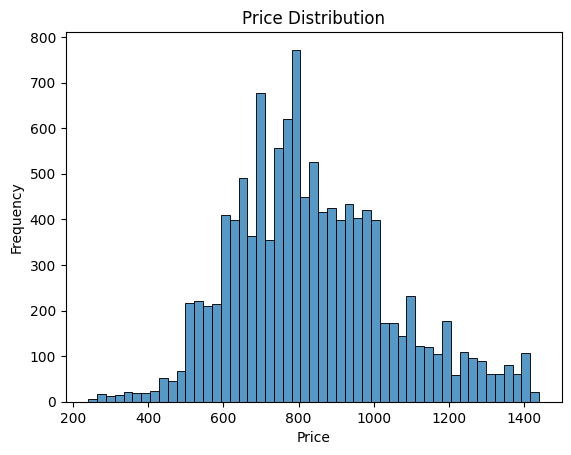

In [13]:
sns.histplot(data=df, x='price')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

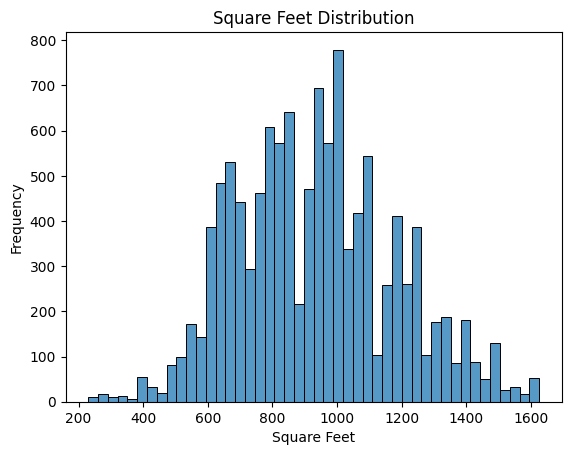

In [14]:
sns.histplot(data=df, x='sqfeet')
plt.title('Square Feet Distribution')
plt.xlabel('Square Feet')
plt.ylabel('Frequency')
plt.show()

In [15]:
df.shape

(11660, 17)

In [16]:
df = df[(df['beds'] >= 0) & (df['beds'] <= 8)]

df = df[(df['baths'] >= 0) & (df['baths'] <= 5)]

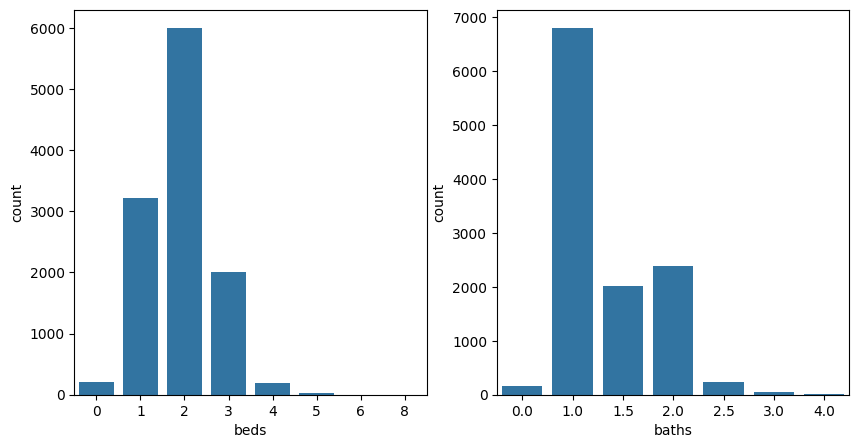

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
sns.countplot(data=df, x='beds', ax=axs[0])
sns.countplot(data=df, x='baths', ax=axs[1])
plt.show()

In [18]:
binary_cols = [
    'cats_allowed', 'dogs_allowed', 'smoking_allowed',
    'wheelchair_access', 'electric_vehicle_charge', 'comes_furnished'
]

for col in binary_cols:
    inval = df.loc[~df[col].isin([0, 1]), col].unique()
    if len(inval) > 0:
        print(f"Invalid values in {col}: {inval}")
        df[col] = df[col].where(df[col].isin([0, 1]), df[col].mode()[0])
    else:
        print(f"All values in '{col}' are valid.")

All values in 'cats_allowed' are valid.
All values in 'dogs_allowed' are valid.
All values in 'smoking_allowed' are valid.
All values in 'wheelchair_access' are valid.
All values in 'electric_vehicle_charge' are valid.
All values in 'comes_furnished' are valid.


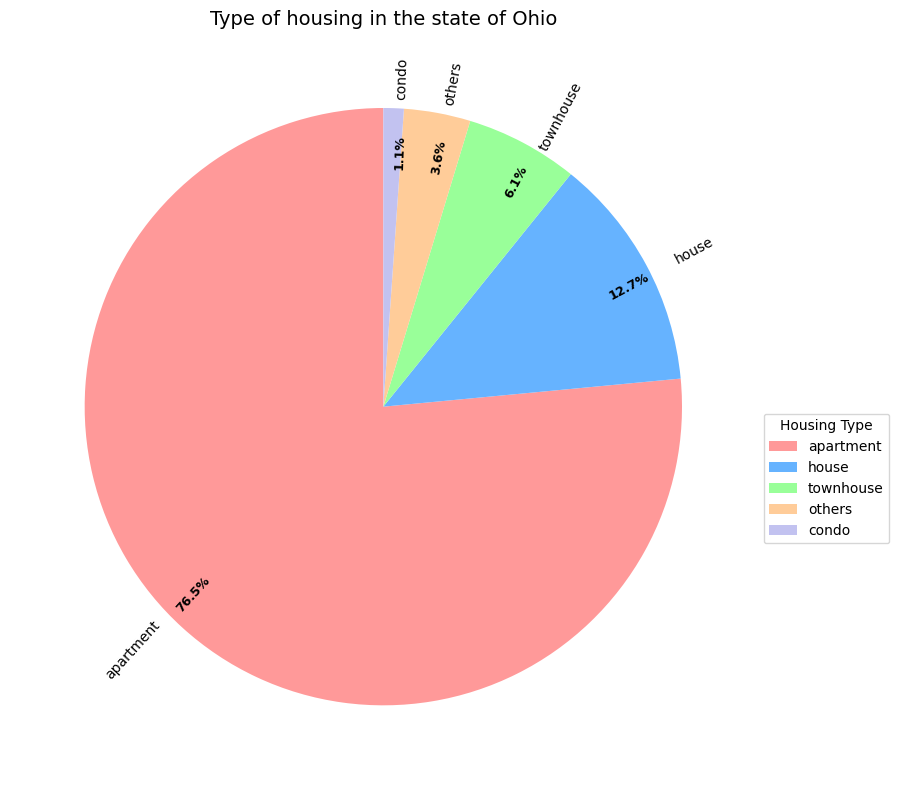

In [19]:
sizes = [76.5, 12.7, 6.1, 3.6, 1.1]
labels = ['apartment', 'house', 'townhouse', 'others', 'condo']
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', '#c2c2f0']
explode = [0, 0, 0, 0, 0]

plt.figure(figsize=(10, 8))

wedges, texts, autotexts = plt.pie(
    sizes,
    labels=labels,
    explode=explode,
    colors=colors,
    autopct='%1.1f%%',
    shadow=False,
    startangle=90,
    labeldistance=1.1,
    pctdistance=0.85
)

for i, (text, autotext) in enumerate(zip(texts, autotexts)):
    ang = (wedges[i].theta2 + wedges[i].theta1)/2

    if 90 <= ang <= 270:
        text.set_rotation(180 + ang)
        text.set_ha('right')

        autotext.set_rotation(180 + ang)
        autotext.set_ha('right')
    else:
        text.set_rotation(ang)
        text.set_ha('left')

        autotext.set_rotation(ang)
        autotext.set_ha('left')

for autotext in autotexts:
    autotext.set_size(9)
    autotext.set_fontweight('bold')

plt.title("Type of housing in the state of Ohio", fontsize=14)
plt.legend(title="Housing Type", loc="best", bbox_to_anchor=(1, 0.5))
plt.tight_layout()

plt.show()

In [20]:
df["type2"]=df.type.apply(lambda x: "others" if x not in ["apartment", "house", "townhouse", "condo"] else x)

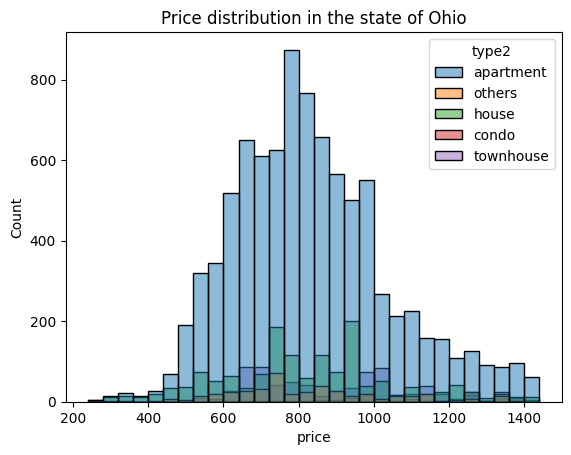

In [21]:
plt.title("Price distribution in the state of Ohio")
sns.histplot(data=df, x='price', bins=30, hue="type2")
plt.show()

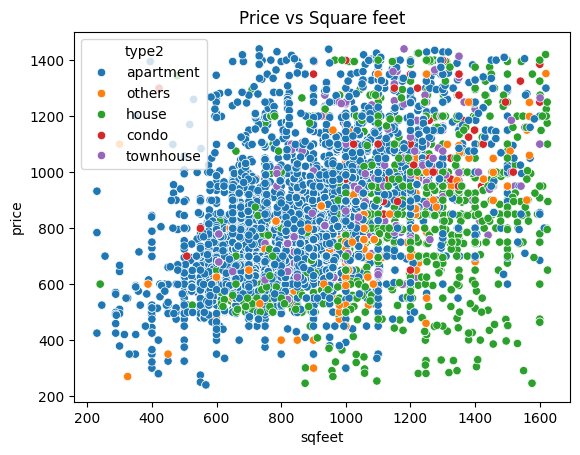

In [22]:
plt.title("Price vs Square feet")
sns.scatterplot(data=df, x='sqfeet', y='price', hue="type2")
plt.show()

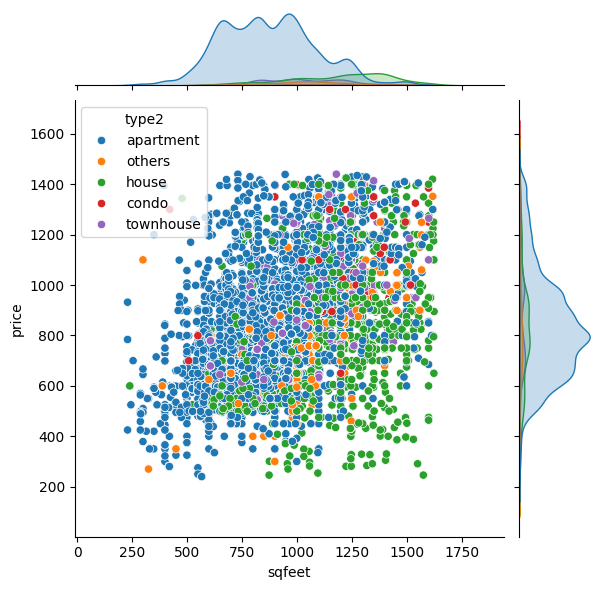

In [23]:
sns.jointplot(data=df, x='sqfeet', y='price', hue="type2")
plt.show()

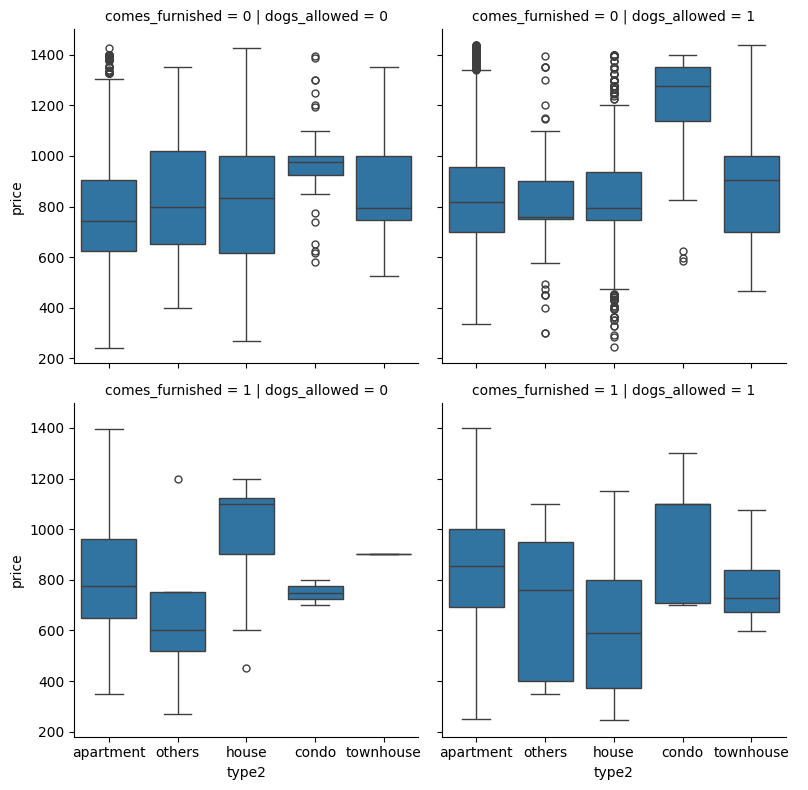

In [24]:
sns.catplot(data=df, x='type2', y='price',
            col="dogs_allowed", row="comes_furnished",
            kind="box", height=4, aspect=1)
plt.show()

In [25]:
df.drop_duplicates(subset=['lat', 'long'], inplace=True)
df.reset_index(drop=True, inplace=True)

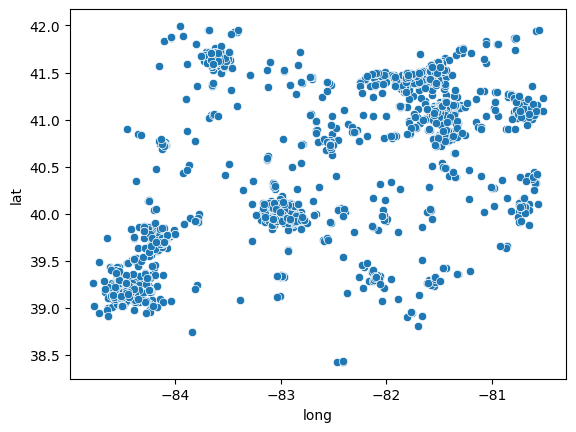

In [26]:
df = df[
    df['lat'].between(38.4, 42.0) &
    df['long'].between(-84.8, -80.5)
]

sns.scatterplot(data=df, x='long', y='lat')
plt.show()

<Axes: >

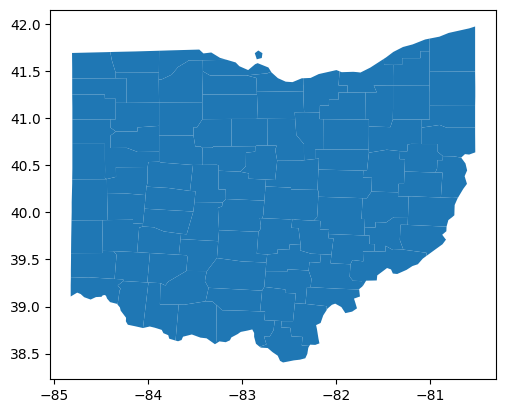

In [27]:
import geopandas as gpd
url = "https://raw.githubusercontent.com/edavgaun/topojson/refs/heads/master/countries/us-states/OH-39-ohio-counties.json"
gdf = gpd.read_file(url)
gdf.plot()

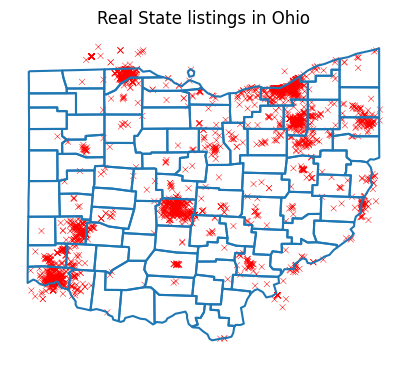

In [28]:
fig, axs = plt.subplots(figsize=(5,5))
gdf.boundary.plot(ax=axs)
sns.scatterplot(data=df, x='long', y='lat', ax=axs,
                color="Red", marker="x", size=2.5,
                legend=None)
plt.title("Real State listings in Ohio")
plt.axis('off')
plt.show()

In [29]:
gdf.shape

(88, 11)

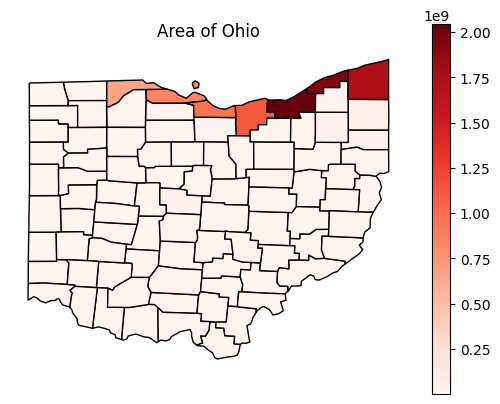

In [30]:
gdf.plot(column='AWATER', cmap="Reds", legend=True,
            edgecolor="Black")
plt.axis("off")
plt.title("Area of Ohio")
plt.show()

In [31]:
df.region.unique()

array(['cincinnati', 'akron / canton', 'columbus', 'dayton / springfield',
       'cleveland', 'lima / findlay', 'toledo', 'northern panhandle',
       'zanesville / cambridge', 'ashtabula', 'chillicothe',
       'tuscarawas co', 'mansfield', 'athens', 'parkersburg-marietta',
       'sandusky', 'youngstown'], dtype=object)

In [32]:
gdf["NAME"].unique()

array(['Miami', 'Preble', 'Marion', 'Wyandot', 'Crawford', 'Clark',
       'Madison', 'Seneca', 'Trumbull', 'Fayette', 'Butler', 'Pickaway',
       'Fulton', 'Logan', 'Sandusky', 'Darke', 'Shelby', 'Carroll',
       'Ottawa', 'Paulding', 'Pike', 'Clinton', 'Hamilton', 'Lawrence',
       'Washington', 'Tuscarawas', 'Richland', 'Greene', 'Wood', 'Ross',
       'Jackson', 'Morrow', 'Mercer', 'Muskingum', 'Noble', 'Defiance',
       'Union', 'Vinton', 'Auglaize', 'Guernsey', 'Hocking', 'Athens',
       'Jefferson', 'Adams', 'Lorain', 'Champaign', 'Williams', 'Monroe',
       'Lucas', 'Fairfield', 'Knox', 'Montgomery', 'Brown', 'Licking',
       'Mahoning', 'Stark', 'Medina', 'Henry', 'Putnam', 'Warren',
       'Summit', 'Highland', 'Hancock', 'Cuyahoga', 'Columbiana',
       'Scioto', 'Morgan', 'Portage', 'Lake', 'Geauga', 'Gallia', 'Perry',
       'Allen', 'Holmes', 'Meigs', 'Delaware', 'Harrison', 'Coshocton',
       'Huron', 'Clermont', 'Ashtabula', 'Erie', 'Ashland', 'Wayne',
       'H

In [33]:
gropuped_df = df[["region", "lat", "long", "price"]].groupby("region").mean()

In [34]:
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="Tarea2")
location = geolocator.geocode("Ohio State")
location.latitude, location.longitude

(40.0056802, -83.0286612)

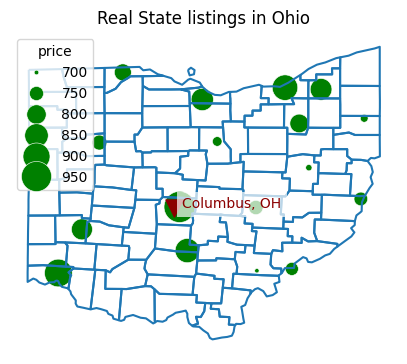

In [35]:
fig, axs = plt.subplots(figsize=(5,5))
gdf.boundary.plot(ax=axs)
sns.scatterplot(
    data=gropuped_df,
    x='long', y='lat', ax=axs,
    color='green', size='price',
    sizes=(10, 500)
)

axs.scatter(
    -83.0286612, 40.0056802,
    marker='v',
    s=150,
    color='darkred'
)

plt.text(
    -83.0286612 + 0.1, 40.007,
    'Columbus, OH',
    fontsize=10,
    color='darkred',
    bbox=dict(facecolor='white', edgecolor='none', alpha=0.7)
)

plt.title('Real State listings in Ohio')
plt.axis('off')
plt.show()


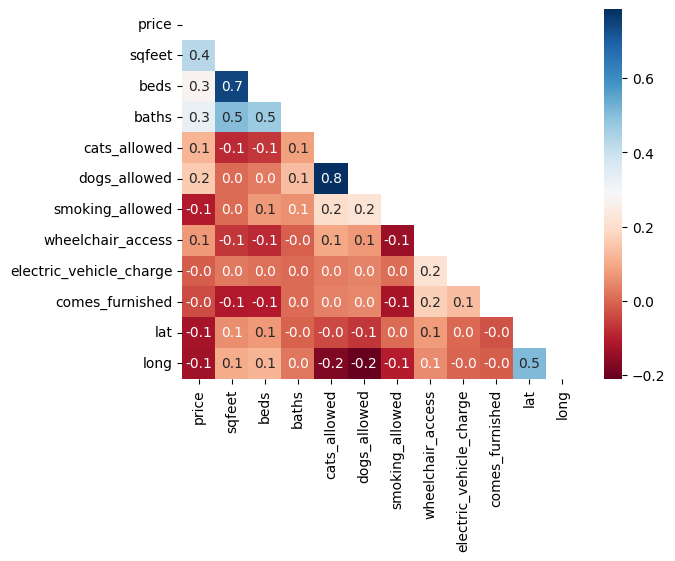

In [36]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='RdBu',
            mask=np.triu(corr), fmt=".1f")
plt.show()

In [37]:
from sklearn.linear_model import LinearRegression

X = df[['sqfeet', 'beds', 'lat', 'long', 'baths',
        'dogs_allowed', 'smoking_allowed']]
y = df['price']

reg = LinearRegression().fit(X, y)
reg.score(X, y)

0.2709810453668764

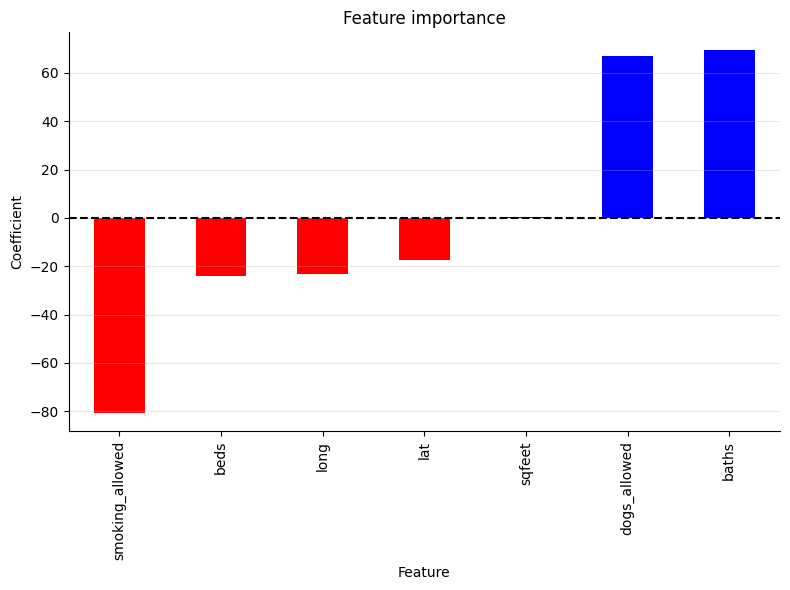

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

coefs = pd.Series(reg.coef_, index=X.columns).sort_values()

fig, ax = plt.subplots(figsize=(8, 6))
coefs.plot(kind='bar', ax=ax, color=['red' if v<0 else 'blue' for v in coefs])

ax.set_title("Feature importance")
ax.set_xlabel("Feature")
ax.set_ylabel("Coefficient")
ax.axhline(0, linestyle='--', color='black')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(axis='y', alpha=0.3)

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [39]:
corpus =df.description.values.tolist()
corpus=";".join(corpus)
type(corpus), len(corpus)

(str, 2183793)

In [40]:
corpus = corpus.lower()
corpus=[word for word in corpus.split(" ") if len(word) > 3]
len(corpus)

227707

In [41]:
import re
bool(re.search(r'\d+', "$400"))

True

In [42]:
corpus = [word for word in corpus if bool(re.search(r'\d', word))==False]
len(corpus)

218082

In [43]:
df["description"][0]

"To schedule a tour We now book our tour appointments online! Please call or text us at   show contact info  to self-schedule from your phone! Book your appointment online today or anytime 24/7! Property Description Seasons on Chelsea Apartments is a prestigious community surrounded by charming landscape with panoramic wooded views in beautiful Fort Mitchell, Kentucky.Our community is designed to provide you with the convenience and comfort you deserve, and includes a resort style swimming pool, a beautiful fishing lake, and fitness center.We understand convenience is a must, and we're located just minutes from interstate I-75 with easy access to Downtown Cincinnati and the CVG Airport.Shopping will be a breeze with what The Fort Mitchell area has to offer; The Florence Mall, Crestview Hills Mall, and Buttermilk Square Shopping Center, Historic Montgomery Inn. Seasons on Chelsea has a lot of entertainment venues close to the property such as Bogartâ\x80\x99s Concert Venue, Country Spor

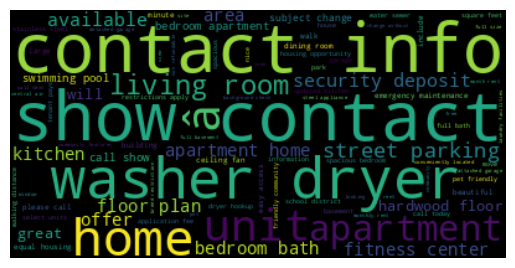

In [44]:
!pip install -q wordcloud
from wordcloud import WordCloud

wordcloud = WordCloud().generate(" ".join(corpus))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [45]:
bow = {}
for word in corpus:
    if word in bow.keys():
        bow[word] += 1
    else:
        bow[word] = 1
bow

{'schedule': 404,
 'tour': 224,
 'book': 57,
 'appointments': 25,
 'online!': 24,
 'please': 595,
 'call': 1255,
 'text': 246,
 'show': 1609,
 'contact': 1922,
 'info': 1289,
 'self-schedule': 16,
 'from': 996,
 'your': 1603,
 'phone!': 16,
 'appointment': 143,
 'online': 251,
 'today': 421,
 'anytime': 26,
 'property': 509,
 'description': 106,
 'seasons': 10,
 'chelsea': 7,
 'apartments': 807,
 'prestigious': 27,
 'community': 1026,
 'surrounded': 26,
 'charming': 73,
 'landscape': 5,
 'with': 4134,
 'panoramic': 4,
 'wooded': 65,
 'views': 101,
 'beautiful': 527,
 'fort': 11,
 'mitchell,': 4,
 'kentucky.our': 1,
 'designed': 46,
 'provide': 79,
 'convenience': 71,
 'comfort': 68,
 'deserve,': 3,
 'includes': 308,
 'resort': 27,
 'style': 200,
 'swimming': 298,
 'pool,': 165,
 'fishing': 11,
 'lake,': 23,
 'fitness': 357,
 'center.we': 1,
 'understand': 12,
 'must,': 1,
 "we're": 27,
 'located': 878,
 'just': 534,
 'minutes': 432,
 'interstate': 42,
 'easy': 334,
 'access': 575,
 'do

In [46]:
first_50 = {k: bow[k] for k in list(bow)[:50]}
first_50

{'schedule': 404,
 'tour': 224,
 'book': 57,
 'appointments': 25,
 'online!': 24,
 'please': 595,
 'call': 1255,
 'text': 246,
 'show': 1609,
 'contact': 1922,
 'info': 1289,
 'self-schedule': 16,
 'from': 996,
 'your': 1603,
 'phone!': 16,
 'appointment': 143,
 'online': 251,
 'today': 421,
 'anytime': 26,
 'property': 509,
 'description': 106,
 'seasons': 10,
 'chelsea': 7,
 'apartments': 807,
 'prestigious': 27,
 'community': 1026,
 'surrounded': 26,
 'charming': 73,
 'landscape': 5,
 'with': 4134,
 'panoramic': 4,
 'wooded': 65,
 'views': 101,
 'beautiful': 527,
 'fort': 11,
 'mitchell,': 4,
 'kentucky.our': 1,
 'designed': 46,
 'provide': 79,
 'convenience': 71,
 'comfort': 68,
 'deserve,': 3,
 'includes': 308,
 'resort': 27,
 'style': 200,
 'swimming': 298,
 'pool,': 165,
 'fishing': 11,
 'lake,': 23,
 'fitness': 357}

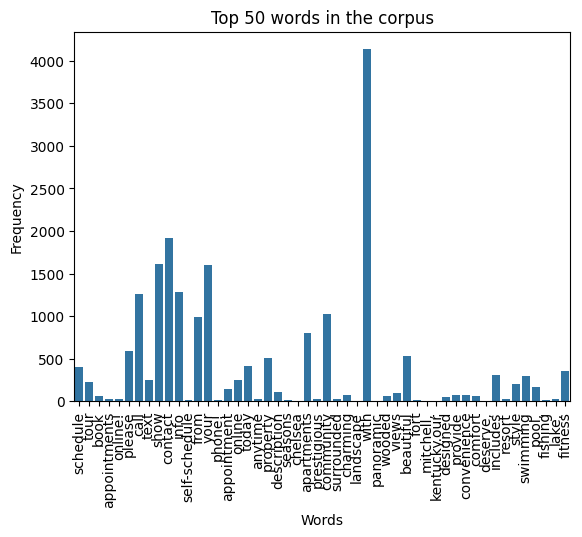

In [47]:
sns.barplot(x=list(first_50.keys()), y=list(first_50.values()))
plt.xticks(rotation=90)
plt.title("Top 50 words in the corpus")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.rcParams['font.size'] = 6
plt.show()

In [48]:
df_bow = pd.DataFrame(data=bow.items(), columns=["Word", "Frq"])
df_bow.head()

,Word,Frq
0,schedule,404
1,tour,224
2,book,57
3,appointments,25
4,online!,24


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49],
 [Text(0, 0, 'with'),
  Text(1, 0, 'contact'),
  Text(2, 0, 'show'),
  Text(3, 0, 'your'),
  Text(4, 0, 'info'),
  Text(5, 0, 'call'),
  Text(6, 0, 'community'),
  Text(7, 0, 'from'),
  Text(8, 0, 'apartments'),
  Text(9, 0, 'please'),
  Text(10, 0, 'beautiful'),
  Text(11, 0, 'property'),
  Text(12, 0, 'today'),
  Text(13, 0, 'schedule'),
  Text(14, 0, 'fitness'),
  Text(15, 0, 'includes'),
  Text(16, 0, 'swimming'),
  Text(17, 0, 'online'),
  Text(18, 0, 'text'),
  Text(19, 0, 'tour'),
  Text(20, 0, 'style'),
  Text(21, 0, 'pool,'),
  Text(22, 0, 'appointment'),
  Text(23, 0, 'description'),
  Text(24, 0, 'views'),
  Text(25, 0, 'provide'),
  Text(26, 0, 'charming'),
  Text(27, 0, 'convenience'),
 

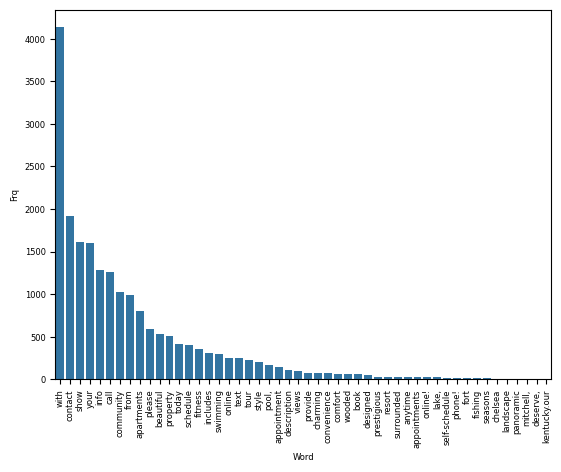

In [49]:
sns.barplot(data=df_bow.head(50).sort_values("Frq", ascending=False),
            x="Word", y="Frq")
plt.xticks(rotation=90)

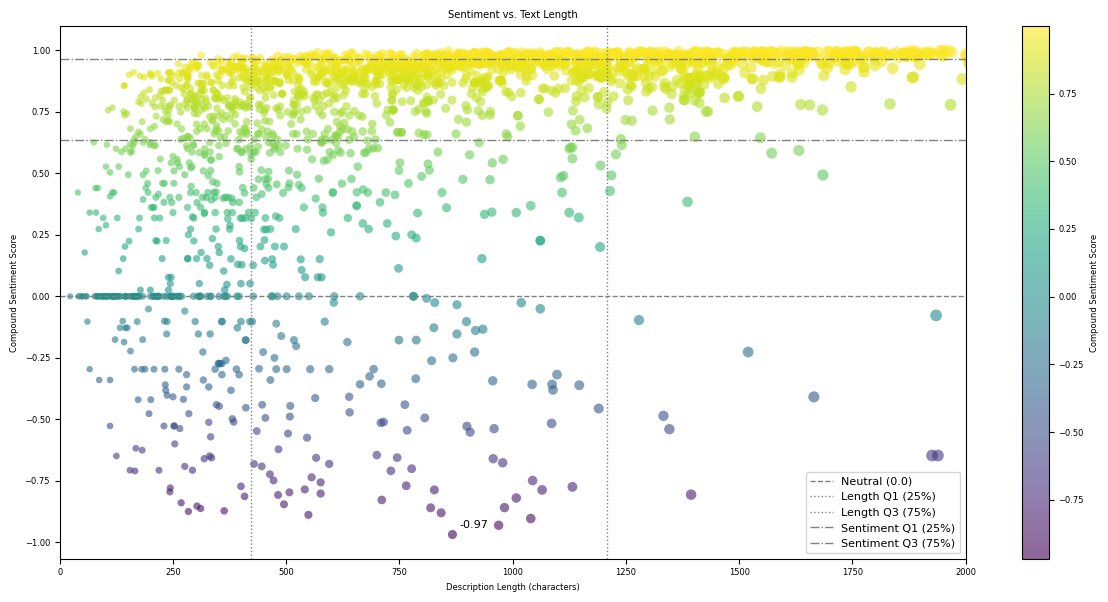

In [50]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon', quiet=True)
sia = SentimentIntensityAnalyzer()

df['sentiment'] = df['description'].astype(str).apply(lambda x: sia.polarity_scores(x)['compound'])
df['length']    = df['description'].astype(str).str.len()

x = df['length']
y = df['sentiment']
l_q1, l_q3 = np.percentile(x, [25, 75])
s_q1, s_q3 = np.percentile(y, [25, 75])

max_size = 200
sizes = (x / x.max()) * max_size + 20

fig, ax = plt.subplots(figsize=(12, 6))

sc = ax.scatter(
    x, y,
    c=y,
    cmap='viridis',
    s=sizes,
    alpha=0.6,
    edgecolors='none'
)

ax.axhline(0, color='gray', linestyle='--', linewidth=1, label='Neutral (0.0)')

ax.axvline(l_q1, color='gray', linestyle=':', linewidth=1, label='Length Q1 (25%)')
ax.axvline(l_q3, color='gray', linestyle=':', linewidth=1, label='Length Q3 (75%)')
ax.axhline(s_q1, color='gray', linestyle='-.', linewidth=1, label='Sentiment Q1 (25%)')
ax.axhline(s_q3, color='gray', linestyle='-.', linewidth=1, label='Sentiment Q3 (75%)')

extremes = pd.concat([df.nsmallest(1, 'sentiment'), df.nlargest(1, 'sentiment')])
for _, row in extremes.iterrows():
    ax.annotate(
        f"{row['sentiment']:.2f}",
        (row['length'], row['sentiment']),
        textcoords='offset points',
        xytext=(5, 5),
        fontsize=8
    )

ax.set_xlim(0, 2000)

ax.set_xlabel('Description Length (characters)')
ax.set_ylabel('Compound Sentiment Score')
ax.set_title('Sentiment vs. Text Length')
cbar = fig.colorbar(sc, ax=ax)
cbar.set_label('Compound Sentiment Score')
ax.legend(loc='lower right', fontsize=8)
ax.grid(False)

plt.tight_layout()
plt.show()

	•	Each point represents one description and is placed according to its text length on the x‑axis and its compound sentiment score on the y‑axis.
	•	Colour gradient runs from purple (strongly negative) through teal/green (neutral) to yellow (strongly positive).
	•	Point size scales with length: longer descriptions appear as larger circles. Most of these larger circles sit above the neutral line, so longer copy tends to be more positive—though a few long texts still fall in the negative zone.
	•	Dotted vertical lines mark the 25th (Q1) and 75th (Q3) percentiles of description length, highlighting the middle 50 % range.
	•	Dash‑dot horizontal lines mark the 25th (Q1 ≈ 0.85) and 75th (Q3 ≈ 1.00) percentiles of sentiment, showing that the central half of descriptions is already strongly positive, and the top quartile is maxed‑out at the highest score.

In [51]:
df['desc_len'] = df['description'].str.len()

lengths = df['desc_len'].values

q1, q3 = np.percentile(lengths, [25, 75])

print(f'Q1 (25 %): {q1:.0f} chars')
print(f'Q3 (75 %): {q3:.0f} chars')
print('Fracción dentro del rango intercuartílico:',
      ((lengths >= q1) & (lengths <= q3)).mean())


Q1 (25 %): 422 chars
Q3 (75 %): 1209 chars
Fracción dentro del rango intercuartílico: 0.49979398434281


The apparent density in the short strip is higher because many very brief descriptions overlap in a small horizontal space.

<ipython-input-52-52078400355e>:43: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


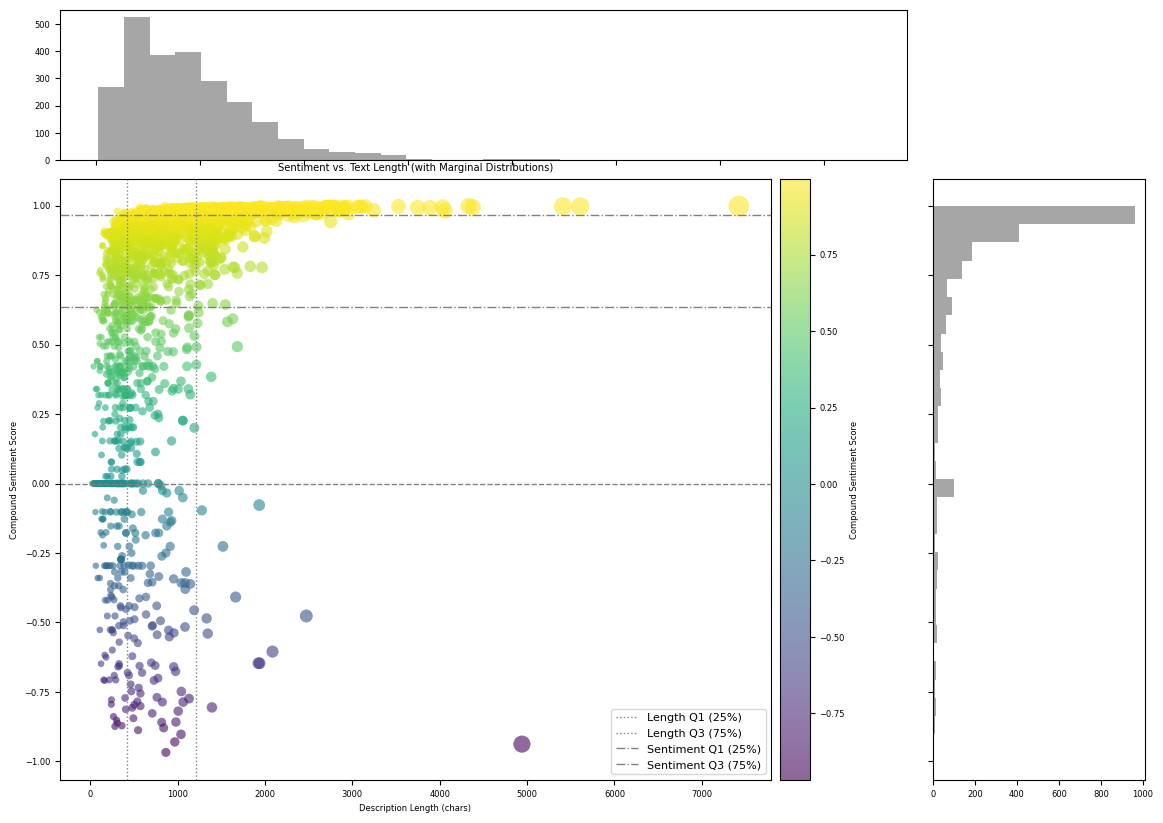

In [52]:
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(14, 10))
gs = GridSpec(2, 2,
              width_ratios=[4, 1],
              height_ratios=[1, 4],
              hspace=0.05,
              wspace=0.05)

ax_scatter = fig.add_subplot(gs[1, 0])
ax_histx   = fig.add_subplot(gs[0, 0], sharex=ax_scatter)
ax_histy   = fig.add_subplot(gs[1, 1], sharey=ax_scatter)

sc = ax_scatter.scatter(
    x, y,
    c=y,
    cmap='viridis',
    s=sizes,
    alpha=0.6,
    edgecolors='none'
)
ax_scatter.axhline(0, color='gray', linestyle='--', linewidth=1)

ax_scatter.axvline(l_q1, color='gray', linestyle=':', linewidth=1, label='Length Q1 (25%)')
ax_scatter.axvline(l_q3, color='gray', linestyle=':', linewidth=1, label='Length Q3 (75%)')
ax_scatter.axhline(s_q1, color='gray', linestyle='-.', linewidth=1, label='Sentiment Q1 (25%)')
ax_scatter.axhline(s_q3, color='gray', linestyle='-.', linewidth=1, label='Sentiment Q3 (75%)')
ax_scatter.legend(loc='lower right', fontsize=8)

ax_histx.hist(x, bins=30, color='gray', alpha=0.7)
ax_histy.hist(y, bins=30, orientation='horizontal', color='gray', alpha=0.7)

plt.setp(ax_histx.get_xticklabels(), visible=False)
plt.setp(ax_histy.get_yticklabels(), visible=False)

ax_scatter.set_xlabel('Description Length (chars)')
ax_scatter.set_ylabel('Compound Sentiment Score')
ax_scatter.set_title('Sentiment vs. Text Length (with Marginal Distributions)')
cbar = fig.colorbar(sc, ax=ax_scatter, pad=0.01)
cbar.set_label('Compound Sentiment Score')
ax_scatter.grid(False)

plt.tight_layout()
plt.show()

	•	Top histogram (length distribution): Most descriptions fall roughly between 400 and 1500 characters, with a diminishing tail of very long texts.
	•	Right histogram (sentiment distribution): The vast majority of sentiment scores sit above 0.8, highlighting an overall strongly positive tone.
	•	Neutral baseline: A dashed horizontal line at y = 0 marks the transition from negative to positive sentiment.